In [1]:
import os
#import skimage
import torch
from torchvision import transforms
import numpy as np
import glob
from skimage import io
import skimage
import matplotlib.pyplot as plt
from Custom_dataloader import *
from Transforms import phantom_segmentation
from Transforms import entropy_mark_transform
from Transforms import hsv_stats_transfrom
from Transforms import lab_stats_transfrom
from Transforms import black_perc_transfrom
import matplotlib.pyplot as plt

#DB="/run/user/1000/gvfs/afp-volume:host=MyCloudPR4100.local,user=admin,volume=Paltas_DataBase/Data_Base"
DBd="//MYCLOUDPR4100/Paltas_DataBase/Data_Base"
DB="//MYCLOUDPR4100/Paltas_DataBase"
d_t=transforms.Compose([phantom_segmentation(False)])

datar=Dataset_direct(root_dir=DBd,ImType=['PhantomRGB'],Intersec=False,retrieve_img=False)

In [2]:
os.listdir(os.path.join(DB,"metadata"))
meta=['bl_per_wmask_phantom','stat_val_hsv_wmask_phantom','stat_val_lab_wmask_phantom']
ddlist=np.array(os.listdir(os.path.join(DB,"metadata",meta[0])))
dlist=np.vectorize(lambda d:d.split(".")[0])(ddlist)
(os.path.join(DB,"metadata",meta[0],dlist[0]))
print(meta)

['bl_per_wmask_phantom', 'stat_val_hsv_wmask_phantom', 'stat_val_lab_wmask_phantom']


In [3]:
import pandas as pd
import seaborn as sns

In [4]:
date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)
Y=np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]]["landmarks"])(dlist)

bl_per_wmask_phantom

In [6]:
dat=np.vectorize(lambda d:(pd.read_pickle(os.path.join(DB,"metadata",meta[0],d)))[d.split('.')[0]])(ddlist).reshape(-1,1)

datafd={
    meta[0]:dlist,
        'black_per':dat.reshape(-1,),
    'date':date,
    'Y':Y
}
data=pd.DataFrame(datafd)
data

,bl_per_wmask_phantom,black_per,date,Y
0,11_junio_1_10_A,0.271260,11_junio,N_Control
1,11_junio_1_10_B,0.240148,11_junio,P_Control
2,11_junio_1_10_C,0.249660,11_junio,K_Control
3,11_junio_1_10_D,0.220348,11_junio,Control
4,11_junio_1_10_E,0.206660,11_junio,H50%
...,...,...,...,...
2641,29_marzo_2_9_C,0.239337,29_marzo,K_Control
2642,29_marzo_2_9_D,0.257425,29_marzo,Control
2643,29_marzo_2_9_E,0.224837,29_marzo,H50%
2644,29_marzo_2_9_F,0.245659,29_marzo,H75%


In [7]:
tips=data[(data["Y"]=='H50%')|(data["Y"]=='H75%')|(data["Y"]=='Control')]
tips

,bl_per_wmask_phantom,black_per,date,Y
3,11_junio_1_10_D,0.220348,11_junio,Control
4,11_junio_1_10_E,0.206660,11_junio,H50%
5,11_junio_1_10_F,0.196895,11_junio,H75%
9,11_junio_1_11_D,0.209933,11_junio,Control
10,11_junio_1_11_E,0.238596,11_junio,H50%
...,...,...,...,...
2638,29_marzo_2_8_G,0.115847,29_marzo,Control
2642,29_marzo_2_9_D,0.257425,29_marzo,Control
2643,29_marzo_2_9_E,0.224837,29_marzo,H50%
2644,29_marzo_2_9_F,0.245659,29_marzo,H75%


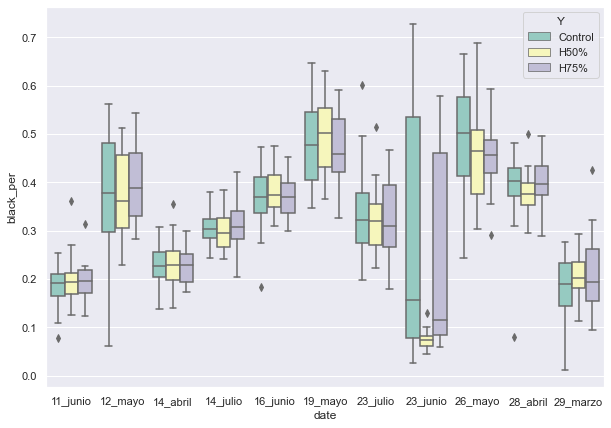

In [8]:
sns.set(rc={'figure.figsize':(10.,7.)})
ax1 = sns.boxplot(x="date", y="black_per", hue="Y",
                 data=tips, palette="Set3")

stat_val_hsv_wmask_phantom

In [9]:
N=1
camp=np.array(['mean','std','mode'])
dat=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[N],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)

datafd={
    meta[N]:dlist,
        'mean':dat[:,0],
        'std':dat[:,1],
        'mode':dat[:,2],
    'date':date,
    'Y':Y
}
data=pd.DataFrame(datafd)
data

,stat_val_hsv_wmask_phantom,mean,std,mode,date,Y
0,11_junio_1_10_A,0.289046,0.080507,0.359928,11_junio,N_Control
1,11_junio_1_10_B,0.285616,0.089140,0.359079,11_junio,P_Control
2,11_junio_1_10_C,0.279931,0.070453,0.300556,11_junio,K_Control
3,11_junio_1_10_D,0.288891,0.058296,0.281048,11_junio,Control
4,11_junio_1_10_E,0.267263,0.090707,0.360951,11_junio,H50%
...,...,...,...,...,...,...
2641,29_marzo_2_9_C,0.219387,0.074460,0.186111,29_marzo,K_Control
2642,29_marzo_2_9_D,0.255162,0.060826,0.272256,29_marzo,Control
2643,29_marzo_2_9_E,0.265598,0.085237,0.265514,29_marzo,H50%
2644,29_marzo_2_9_F,0.264396,0.084294,0.272465,29_marzo,H75%


In [10]:
tips=data[(data["Y"]=='H50%')|(data["Y"]=='H75%')|(data["Y"]=='Control')]
tips

,stat_val_hsv_wmask_phantom,mean,std,mode,date,Y
3,11_junio_1_10_D,0.288891,0.058296,0.281048,11_junio,Control
4,11_junio_1_10_E,0.267263,0.090707,0.360951,11_junio,H50%
5,11_junio_1_10_F,0.284088,0.093255,0.232357,11_junio,H75%
9,11_junio_1_11_D,0.300064,0.071530,0.302100,11_junio,Control
10,11_junio_1_11_E,0.302258,0.073232,0.359928,11_junio,H50%
...,...,...,...,...,...,...
2638,29_marzo_2_8_G,0.272619,0.070895,0.247071,29_marzo,Control
2642,29_marzo_2_9_D,0.255162,0.060826,0.272256,29_marzo,Control
2643,29_marzo_2_9_E,0.265598,0.085237,0.265514,29_marzo,H50%
2644,29_marzo_2_9_F,0.264396,0.084294,0.272465,29_marzo,H75%


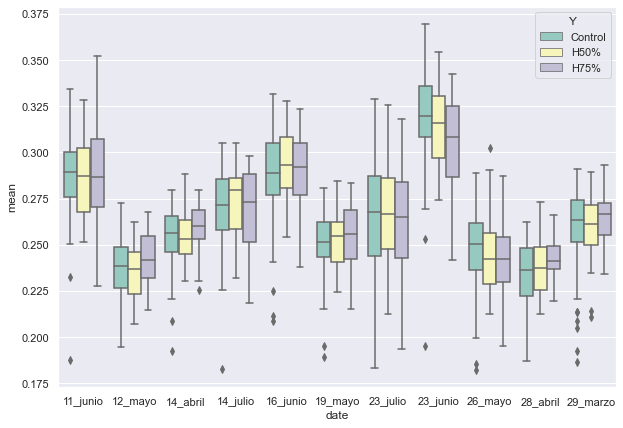

In [11]:
sns.set(rc={'figure.figsize':(10.,7.)})
ax = sns.boxplot(x="date", y="mean", hue="Y",
                 data=tips, palette="Set3")

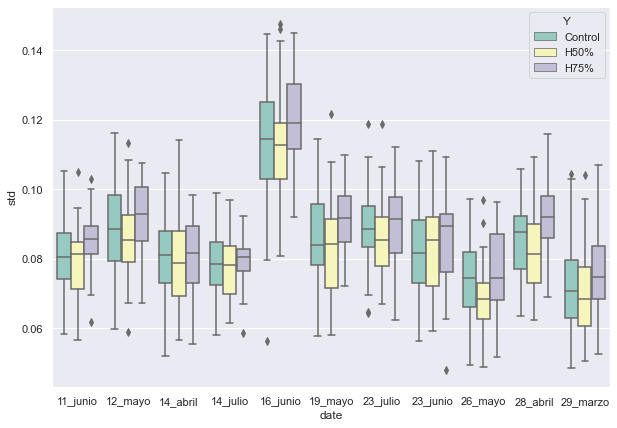

In [12]:
sns.set(rc={'figure.figsize':(10.,7.)})
ax = sns.boxplot(x="date", y="std", hue="Y",
                 data=tips, palette="Set3")

stat_val_lab_wmask_phantom

In [13]:
N=2
camp=np.array(['mean','std','mode'])
dat=np.vectorize(lambda d,c:(pd.read_pickle(os.path.join(DB,"metadata",meta[N],d)))[d.split('.')[0]][c],
            signature="(),()->()")(ddlist.reshape(-1,1),camp)
datafd={
    meta[N]:dlist,
        'mean':dat[:,0],
        'std':dat[:,1],
        'mode':dat[:,2],
    'date':date,
    'Y':Y
}
data=pd.DataFrame(datafd)
data

,stat_val_lab_wmask_phantom,mean,std,mode,date,Y
0,11_junio_1_10_A,5.579561,2.392275,6.113646,11_junio,N_Control
1,11_junio_1_10_B,6.014204,2.194136,6.112457,11_junio,P_Control
2,11_junio_1_10_C,5.565204,2.388955,6.112457,11_junio,K_Control
3,11_junio_1_10_D,5.603238,2.373519,6.112457,11_junio,Control
4,11_junio_1_10_E,5.942148,2.292411,6.112457,11_junio,H50%
...,...,...,...,...,...,...
2641,29_marzo_2_9_C,5.501778,2.294248,5.615772,29_marzo,K_Control
2642,29_marzo_2_9_D,4.585215,2.236201,2.528976,29_marzo,Control
2643,29_marzo_2_9_E,5.246325,2.243122,4.819172,29_marzo,H50%
2644,29_marzo_2_9_F,4.818452,2.308415,2.528948,29_marzo,H75%


In [14]:
tips=data[(data["Y"]=='H50%')|(data["Y"]=='H75%')|(data["Y"]=='Control')]
tips

,stat_val_lab_wmask_phantom,mean,std,mode,date,Y
3,11_junio_1_10_D,5.603238,2.373519,6.112457,11_junio,Control
4,11_junio_1_10_E,5.942148,2.292411,6.112457,11_junio,H50%
5,11_junio_1_10_F,5.703322,2.348592,5.614680,11_junio,H75%
9,11_junio_1_11_D,5.688093,2.316988,6.112457,11_junio,Control
10,11_junio_1_11_E,5.590003,2.305968,6.411123,11_junio,H50%
...,...,...,...,...,...,...
2638,29_marzo_2_8_G,6.281869,2.251584,6.120953,29_marzo,Control
2642,29_marzo_2_9_D,4.585215,2.236201,2.528976,29_marzo,Control
2643,29_marzo_2_9_E,5.246325,2.243122,4.819172,29_marzo,H50%
2644,29_marzo_2_9_F,4.818452,2.308415,2.528948,29_marzo,H75%


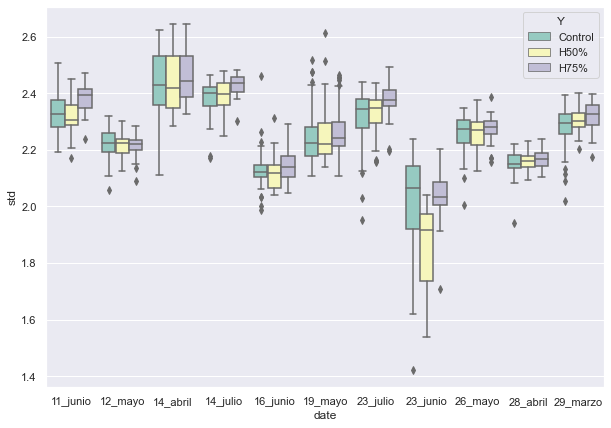

In [61]:
sns.set(rc={'figure.figsize':(10.,7.)})
ax1 = sns.boxplot(x="date", y="std", hue="Y",
                 data=tips, palette="Set3")


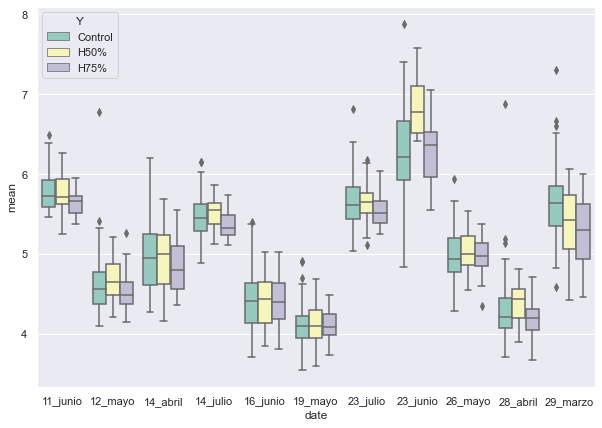

In [15]:
ax2 = sns.boxplot(x="date", y="mean", hue="Y",
                 data=tips, palette="Set3")

In [11]:
np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)
#np.vectorize(lambda d:datar[np.where(datar.aID==d)[0][0]])(dlist)

array(['11_junio', '11_junio', '11_junio', ..., '29_marzo', '29_marzo',
       '29_marzo'], dtype='<U8')

In [12]:
#date=np.vectorize(lambda d:("_").join(datar[np.where(datar.aID==d)[0][0]]["Date"].split("_")[:2]))(dlist)

Y

array(['N_Control', 'P_Control', 'K_Control', ..., 'H50%', 'H75%',
       'Control'], dtype='<U13')

In [26]:
sns.boxplot?